<a href="https://colab.research.google.com/github/vanessa-oreza/python/blob/2-machine-learning/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Explorando los datos**

In [1]:
import pandas as pd

datos =  pd.read_csv('/content/flights.csv')
datos.shape

(30740, 11)

In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30740 entries, 0 to 30739
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       30740 non-null  int64  
 1   airline         30740 non-null  object 
 2   aircraft_type   30740 non-null  object 
 3   schengen        30740 non-null  object 
 4   origin          30740 non-null  object 
 5   arrival_time    30740 non-null  float64
 6   departure_time  30740 non-null  float64
 7   day             30740 non-null  int64  
 8   year            30740 non-null  int64  
 9   is_holiday      30740 non-null  bool   
 10  delay           30740 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 2.4+ MB


In [5]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000
mean,15.348796,13.318556,16.523435,174.300911,2012.328399,12.572553
std,8.647682,4.027473,4.150957,104.059407,1.630492,23.241823
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-39.922816
25%,8.000000,8.939996,12.668655,85.000000,2011.000000,-4.560526
50%,15.000000,14.376052,17.967963,170.000000,2012.000000,9.706861
75%,23.000000,16.909690,20.041281,262.000000,2014.000000,27.849041
max,30.000000,19.341235,23.341235,364.000000,2015.000000,123.340562


In [6]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,30740,30740,30740,30740
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,20564,13315,18405,6133


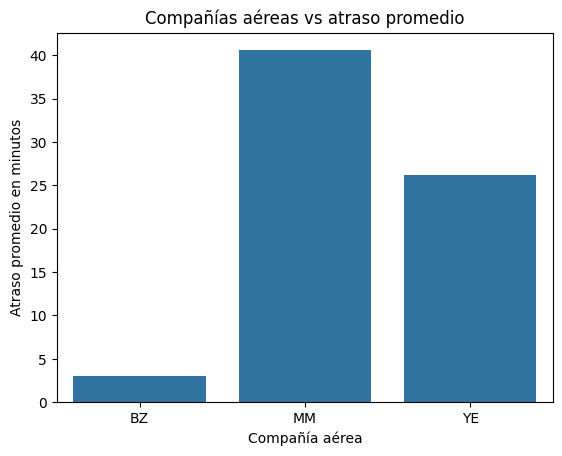

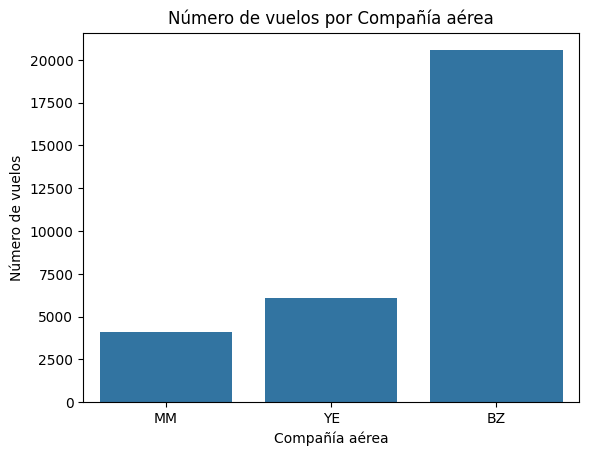

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

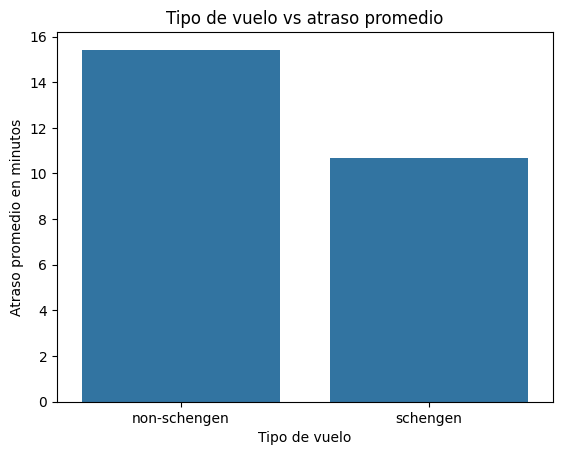

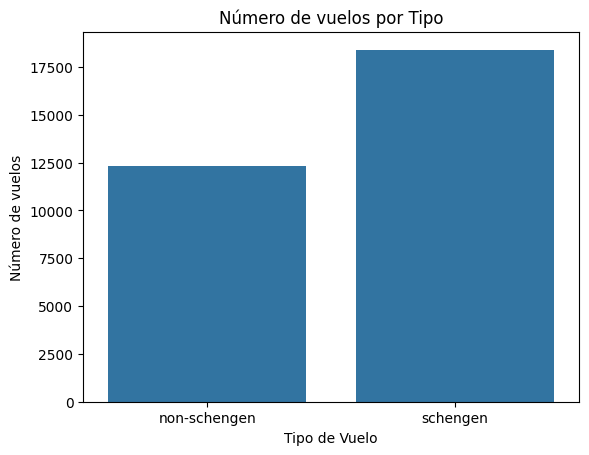

In [8]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

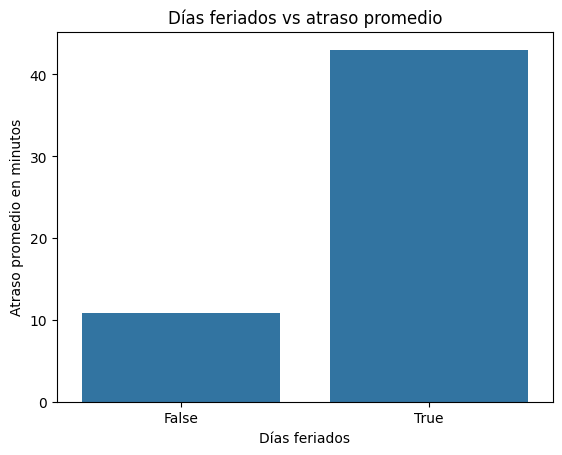

In [9]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [10]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

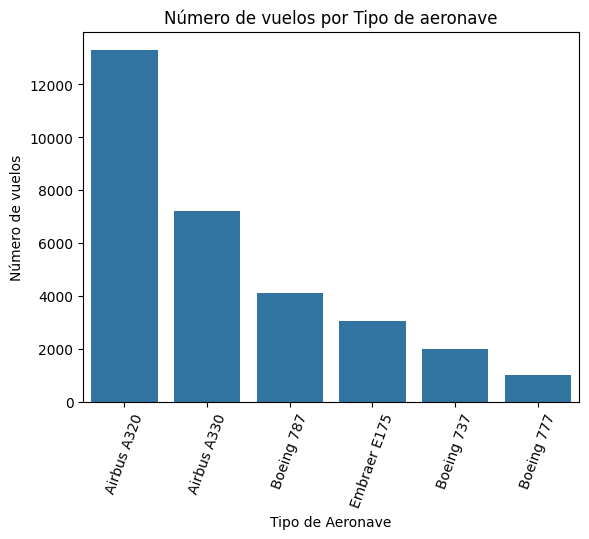

In [11]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

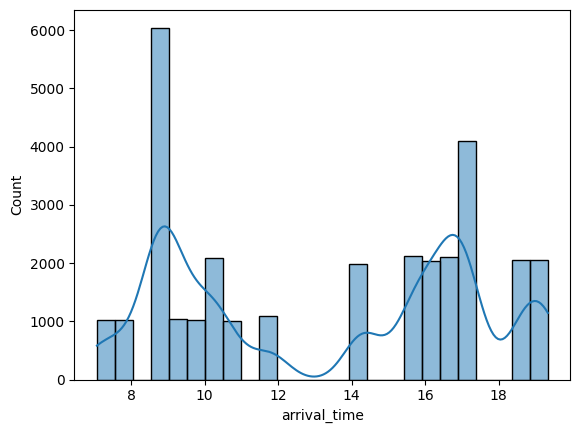

In [12]:
sns.histplot(data=datos,x='arrival_time',kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [14]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

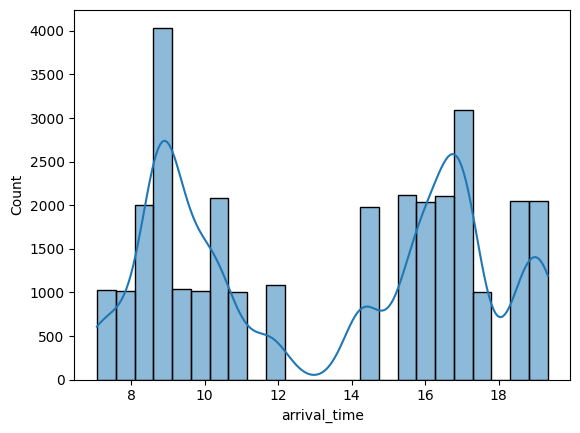

In [15]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='arrival_time', ylabel='Count'>

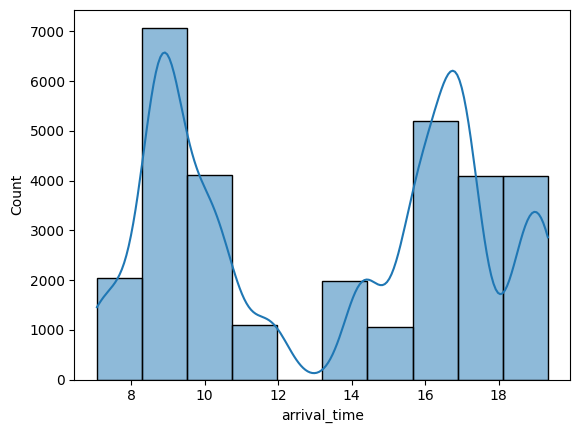

In [13]:
sns.histplot(data=datos,x='arrival_time',kde=True,bins=10)

<Axes: xlabel='departure_time', ylabel='Count'>

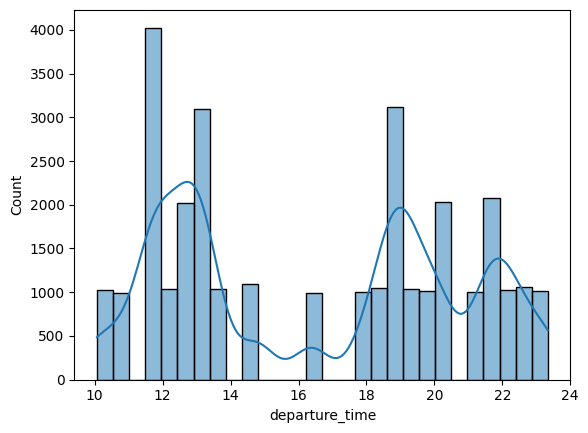

In [16]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

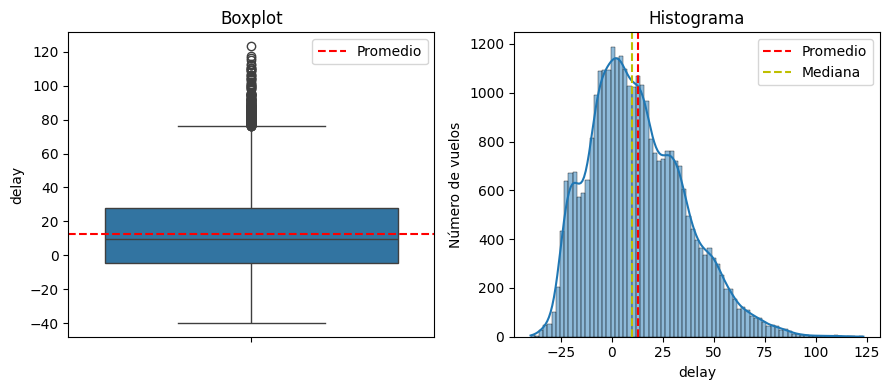

In [17]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#**CLASE 2**

In [18]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [25]:
datos['date']=datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos['date']=pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
30738,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,224,2015,False,59.252275,2015-08-13
30739,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,224,2015,False,4.000000,2015-08-13


In [28]:
datos['is_weekend']=datos['date'].dt.weekday.isin([5,6])
datos['day_name']=datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
10513,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,335,2011,False,-1.959837,2011-12-02,False,Friday
22697,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,53,2014,False,-26.853131,2014-02-23,True,Sunday
5981,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,33,2011,False,17.923898,2011-02-03,False,Thursday
23889,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,132,2014,False,34.939598,2014-05-13,False,Tuesday
16682,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,17,2013,False,-6.510014,2013-01-18,False,Friday


#**CLASE 3**

https://scikit-learn.org/stable/

#**CLASE 4**